**Import Libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sa-twitter/train.csv
/kaggle/input/sa-twitter/test.csv


**Display Max Columns & Rows**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Load the Training & Testing Dataset**

In [ ]:
train_data = pd.read_csv('/kaggle/input/sa-twitter/train.csv',encoding='latin1');
test_data = pd.read_csv('/kaggle/input/sa-twitter/test.csv',encoding='latin1');


**Concatenate train and test dataset**

In [ ]:
df = pd.concat([train_data,test_data])

**Display first 5 rows of the dataset**

In [ ]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


**Check data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


**Removal of unnecessary characters**

In [ ]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

**Tokenization**

In [ ]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

**Normalization**

In [ ]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

**Removal of Stopwords**

In [ ]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

**Removal of Missing Values**

In [ ]:
df.dropna(inplace=True)

**Sentiment Valuecounts**

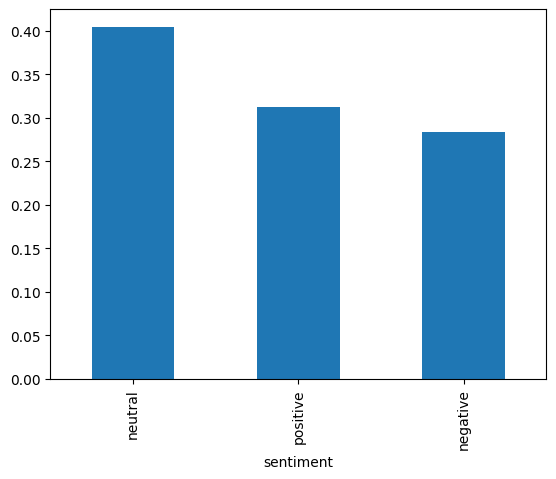

In [ ]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [ ]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

**CATEGORIZATION**

convert the'sentiment' column in the DataFrame 'df' to categorical data and then encode it as numerical codes. Then I'll calculate the distribution of these emotion codes and plot it in a bar graph

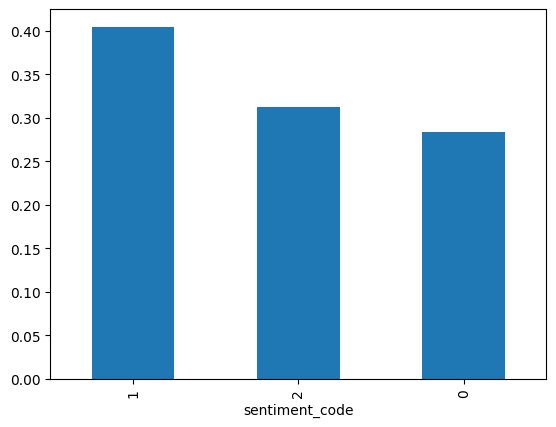

In [ ]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

**Visualization Using Histplot**

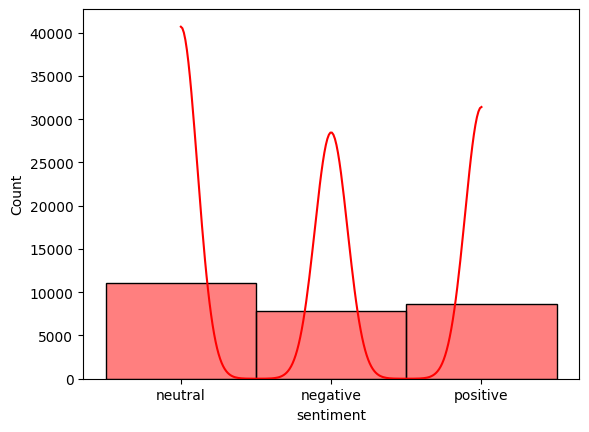

In [ ]:
sns.histplot(df['sentiment'], kde=True, color = 'r')
plt.show()

**Stems Words Using the Lancaster Stemmer**

The stopwords and exclamation marks were removed from the data, and a Lancaster stemmer was applied to unify word forms. A text collection was then created from the DataFrame. Finally, the length of the corpus and its first element were printed.

In [ ]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


**Word Frequency Distribution**

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


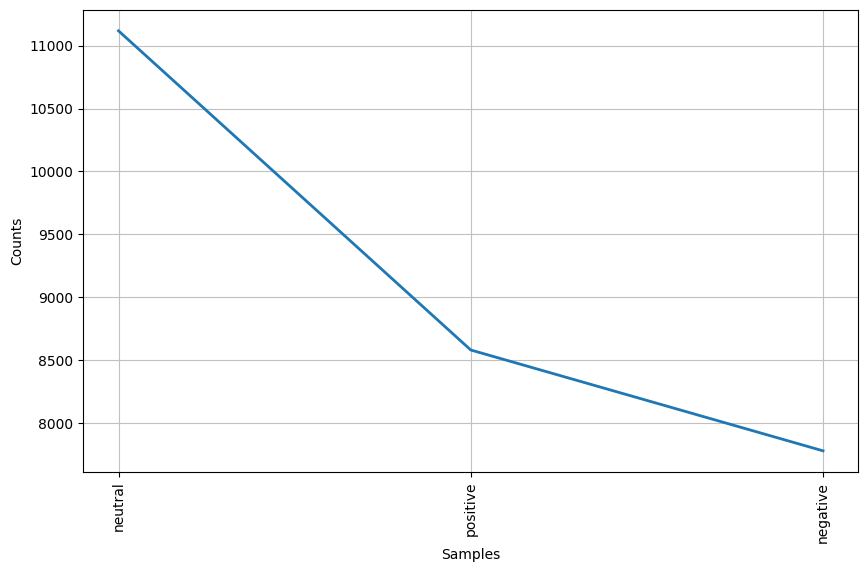

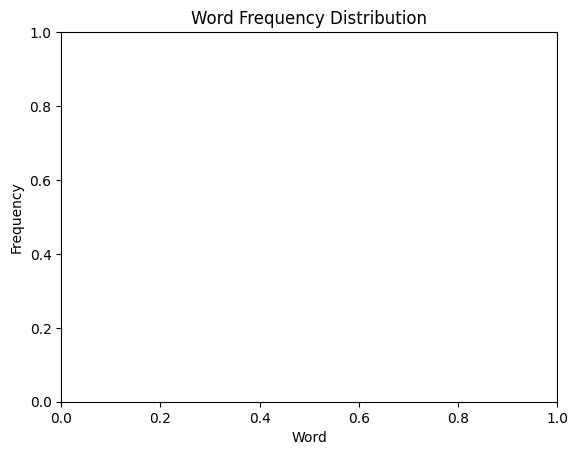

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure NLTK's tokenizer is available
nltk.download('punkt')

# Tokenizing words from the 'sentiment' column after joining all text
text_data = ' '.join(df['sentiment'].dropna())  # Drop NaN values if any
word_tokens = word_tokenize(text_data)

# Compute word frequency distribution
word_freq = FreqDist(word_tokens)

# Plot the top 20 most common words
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


**Convert to Strings**

Two columns, "text" and "sentiment," were created in DataFrameData_eda. The "text" column stores the tweet text, which was converted to strings and stored in a list (final_corpus), while the "sentiment" column retains the sentiment values from the original DataFrame (df).

In [ ]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

**Removal of Irrelevent Columns**

In [ ]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

PREPROCESS TEXT

A function, wp(text), was defined to preprocess text data by removing URLs, HTML tags, punctuation, newline characters, and alphanumeric words containing digits. This preprocessing function was then applied to the 'selected_text' column of the DataFrame, DF.

In [ ]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp)

**Evaluation of Dataset**

In [ ]:
X=df['selected_text']
y= df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Creating TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [ ]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
pred_lr=lr.predict(XV_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8286026200873362

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



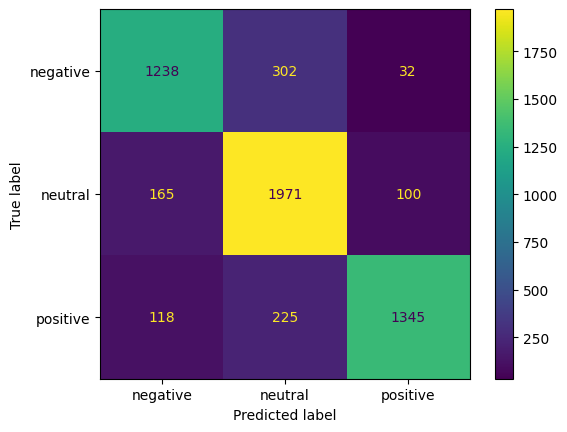

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = dt.predict(XV_test)

In [ ]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.7556404657933042

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.69      0.75      0.72      1572
     neutral       0.76      0.76      0.76      2236
    positive       0.82      0.75      0.79      1688

    accuracy                           0.76      5496
   macro avg       0.76      0.75      0.76      5496
weighted avg       0.76      0.76      0.76      5496



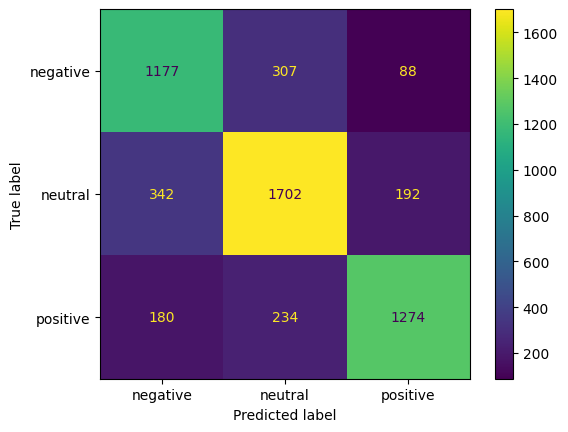

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = rfc.predict(XV_test)

In [ ]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.8116812227074236

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.77      1572
     neutral       0.77      0.90      0.83      2236
    positive       0.92      0.75      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



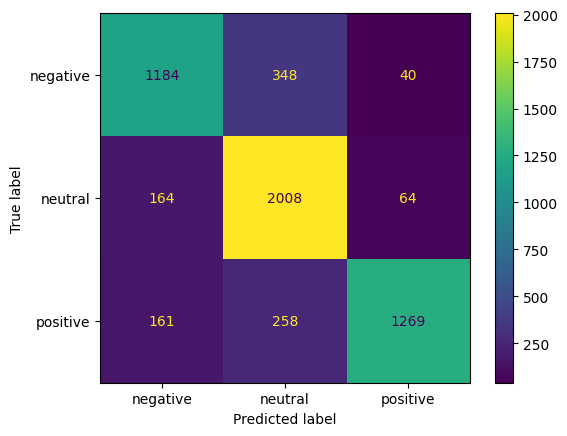

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

**Results of Predictive Models**

In [ ]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')


Baseline model:0.40454876273653567 
Logistic regression 0.8286026200873362
Decision Tree Classification 0.7556404657933042
Randim Forest Classifier 0.8116812227074236


Functions were defined to predict the sentiment of a text using a machine learning model. The output_label() function translates numerical sentiment labels into readable text labels, while manual_testing() utilizes a trained model to predict the sentiment of a given text and prints the result using output_label().

In [ ]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[1])))

A function, manual_testing, is being defined to convert input text to uppercase, create a DataFrame with a single column named "text" containing the processed text, vectorize the text using a predefined vectorization technique, and return the vectorized representation of the text.









In [ ]:
def wp(text):
    return text.upper()
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test
text = "I am Sad"
manual_testing(text)

<1x15389 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

**Conclusion**

Several preprocessing steps were applied to the dataset as part of sentiment analysis using NLP. Following preprocessing, the dataset was trained and evaluated using different machine learning models. The accuracy scores for each model were as follows:

Logistic Regression: 82.86%
Decision Tree Classification: 76.07%
Random Forest Classifier: 81.17%
These accuracy scores reflect the performance of each model in predicting sentiment based on the processed text. Among the models assessed, Logistic Regression achieved the highest accuracy, followed by the Random Forest Classifier, while the Decision Tree Classification had the lowest performance.